# Understanding the local electricity market

## 💾 The data
You have access to over five years of energy price and demand data ([source](https://www.kaggle.com/aramacus/electricity-demand-in-victoria-australia)):

- "date" - from January 1, 2015, to October 6, 2020.
- "demand" - daily electricity demand in MWh.
- "price" - recommended retail price in AUD/MWh.
- "demand_pos_price" - total daily demand at a positive price in MWh.
- "price_positive" - average positive price, weighted by the corresponding intraday demand in AUD/MWh.
- "demand_neg_price" - total daily demand at a negative price in MWh.
- "price_negative" - average negative price, weighted by the corresponding intraday demand in AUD/MWh.
- "frac_neg_price" - the fraction of the day when the demand traded at a negative price.
- "min_temperature" - minimum temperature during the day in Celsius.
- "max_temperature" - maximum temperature during the day in Celsius.
- "solar_exposure" - total daily sunlight energy in MJ/m^2.
- "rainfall" - daily rainfall in mm.
- "school_day" - "Y" if that day was a school day, "N" otherwise.
- "holiday" - "Y" if the day was a state or national holiday, "N" otherwise.

Note: The price was negative during some intraday intervals, so energy producers were paying buyers rather than vice-versa.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('energy_demand.csv', parse_dates=['date'])
df.head()

,date,demand,price,demand_pos_price,price_positive,demand_neg_price,price_negative,frac_neg_price,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


## Relevant Questions

1. How do energy prices change throughout the year? Are there any patterns by season or month of the year?
2. Build a forecast of daily energy prices the company can use as the basis of its financial planning.
3. Provide guidance on how much revenue the energy storage venture could generate per year using retail prices and a 70MWh storage system.

## Data Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              2106 non-null   datetime64[ns]
 1   demand            2106 non-null   float64       
 2   price             2106 non-null   float64       
 3   demand_pos_price  2106 non-null   float64       
 4   price_positive    2106 non-null   float64       
 5   demand_neg_price  2106 non-null   float64       
 6   price_negative    2106 non-null   float64       
 7   frac_neg_price    2106 non-null   float64       
 8   min_temperature   2106 non-null   float64       
 9   max_temperature   2106 non-null   float64       
 10  solar_exposure    2105 non-null   float64       
 11  rainfall          2103 non-null   float64       
 12  school_day        2106 non-null   object        
 13  holiday           2106 non-null   object        
dtypes: datetime64[ns](1), fl

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df['solar_exposure'].isnull().any()

True

In [6]:
df['solar_exposure'].head()

0    23.6
1    26.8
2    26.5
3    25.2
4    30.7
Name: solar_exposure, dtype: float64

In [7]:
df['solar_exposure'].fillna(df['solar_exposure'].mean())

0       23.6
1       26.8
2       26.5
3       25.2
4       30.7
        ... 
2101    22.0
2102    19.8
2103     8.4
2104     7.3
2105     5.8
Name: solar_exposure, Length: 2106, dtype: float64

In [8]:
df['rainfall'].isnull().any()

True

In [9]:
df['rainfall'].fillna(df['rainfall'].mean())

0        0.0
1        0.0
2        0.0
3        4.2
4        0.0
        ... 
2101     0.0
2102     0.0
2103     0.0
2104    12.8
2105     1.0
Name: rainfall, Length: 2106, dtype: float64

In [10]:
df['school_day'].unique()

array(['N', 'Y'], dtype=object)

In [11]:
df['holiday'].unique()

array(['Y', 'N'], dtype=object)

##  Change throughout the yearin the energy prices.

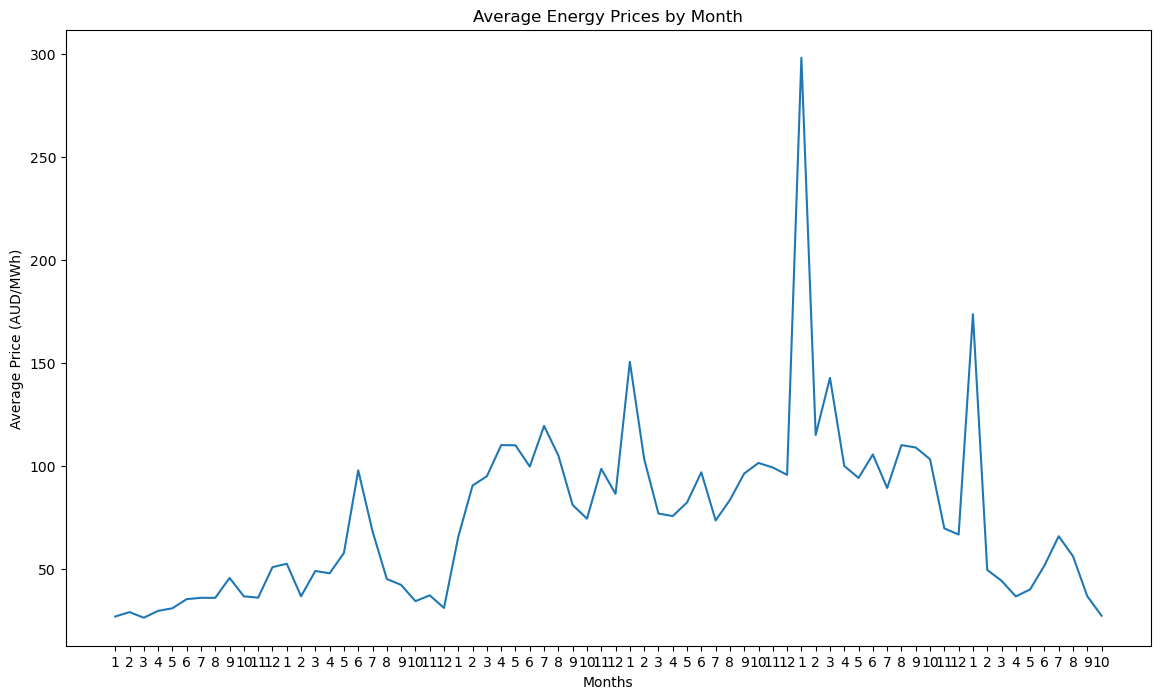

In [12]:
# Extract month and year from the date column
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Calculate the average price per month
monthly_average_prices = df.groupby(['year', 'month'])['price'].mean().reset_index()

# Plot the average price per month
plt.figure(figsize=(14, 8))
plt.plot(monthly_average_prices['price'])
plt.xlabel('Months')
plt.ylabel('Average Price (AUD/MWh)')
plt.title('Average Energy Prices by Month')
plt.xticks(range(len(monthly_average_prices)), monthly_average_prices['month'])
plt.show()

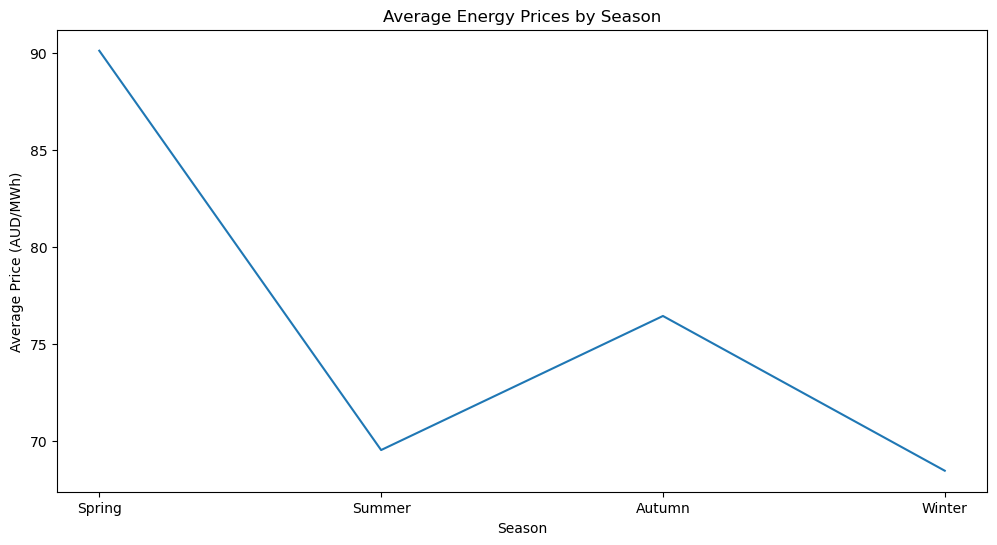

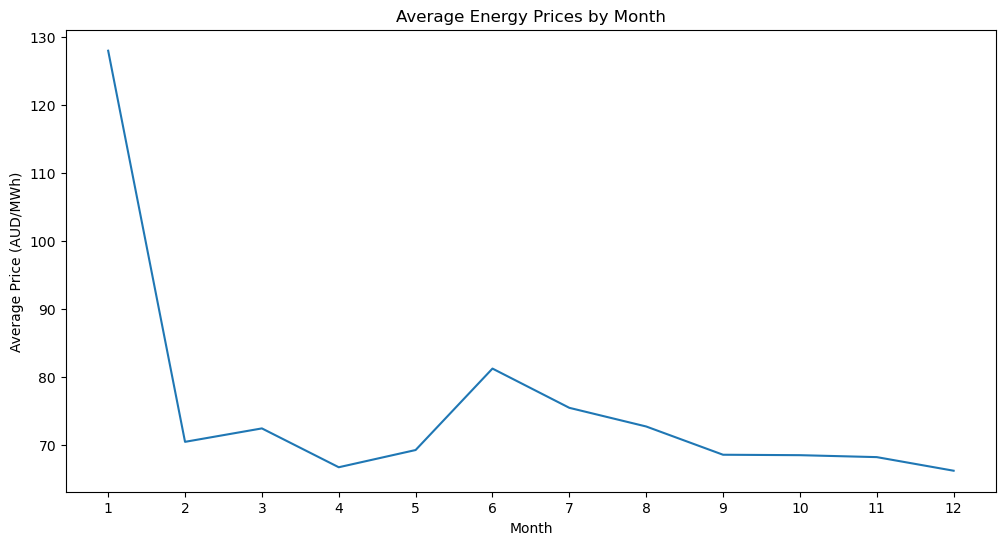

In [13]:
df['season'] = (df['month'] % 12 + 3) // 3

# Calculate the average price by season
seasonal_average_prices = df.groupby('season')['price'].mean()

# Calculate the average price by month
monthly_average_prices = df.groupby('month')['price'].mean()

# Plot average prices by season
plt.figure(figsize=(12, 6))
plt.plot(seasonal_average_prices)
plt.xlabel('Season')
plt.ylabel('Average Price (AUD/MWh)')
plt.title('Average Energy Prices by Season')
plt.xticks(range(1, 5), ['Spring', 'Summer', 'Autumn', 'Winter'])
plt.show()

# Plot average prices by month
plt.figure(figsize=(12, 6))
plt.plot(monthly_average_prices)
plt.xlabel('Month')
plt.ylabel('Average Price (AUD/MWh)')
plt.title('Average Energy Prices by Month')
plt.xticks(range(1, 13))
plt.show()

## Forecast.

/home/mlefair/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/mlefair/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/mlefair/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


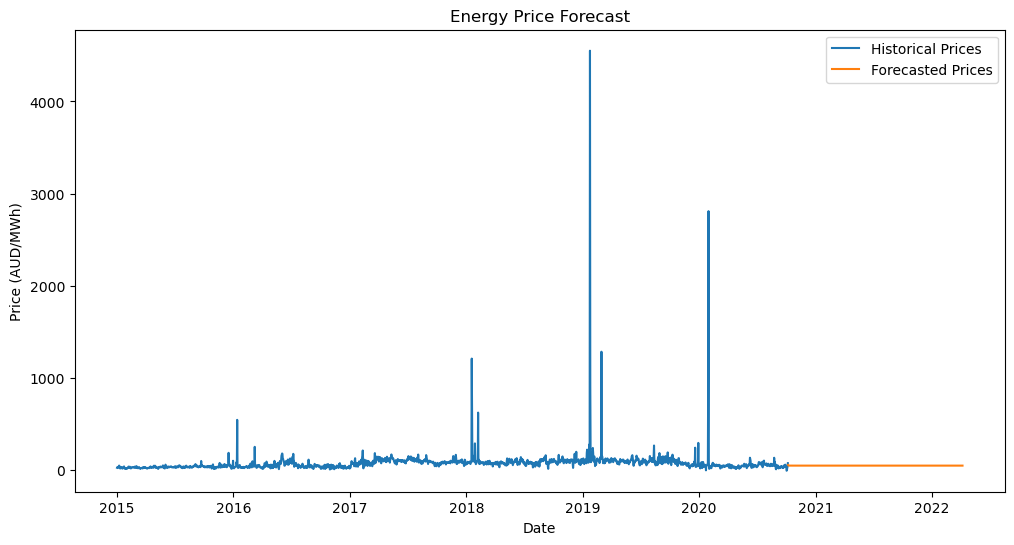

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Extract the 'price' column for modeling
price_data = df['price']

# Fit the ARIMA model
model = ARIMA(price_data, order=(1, 1, 1))  # Set the appropriate order (p, d, q) values
model_fit = model.fit()

# Forecast future prices
forecast_start = df.index[-1] + pd.DateOffset(days=1)
forecast_end = forecast_start + pd.DateOffset(months=18)  # Forecast for the next 12-18 months
forecast = model_fit.predict(start=forecast_start, end=forecast_end)

# Plot the historical prices and the forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(price_data.index, price_data, label='Historical Prices')
plt.plot(forecast.index, forecast, label='Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price (AUD/MWh)')
plt.title('Energy Price Forecast')
plt.legend()
plt.show()


In [15]:
forecast

2020-10-07    55.518324
2020-10-08    50.739562
2020-10-09    49.611983
2020-10-10    49.345923
2020-10-11    49.283145
                ...    
2022-04-03    49.263757
2022-04-04    49.263757
2022-04-05    49.263757
2022-04-06    49.263757
2022-04-07    49.263757
Freq: D, Name: predicted_mean, Length: 548, dtype: float64

In [16]:
# Calculate the price differentials
price_diff = df['price_positive'] - df['price_negative']

# Calculate the energy stored and sold per day
energy_stored_per_day = df['demand_neg_price'] * price_diff

# Calculate the utilization rate of the storage system
utilization_rate = energy_stored_per_day.sum() / (70 * len(df))

# Calculate revenue per day
revenue_per_day = utilization_rate * price_diff.mean() * 70

# Calculate annual revenue
annual_revenue = revenue_per_day * 365

print(f"Estimated annual revenue from the energy storage venture: {annual_revenue:.2f} AUD")


Estimated annual revenue from the energy storage venture: 1505852383.94 AUD
